In [12]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
Wearable = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo4_20/4_20_stationary.xlsx',header=0,index_col=False)

### match the dataset size

In [32]:
Stationary.drop([0,554],inplace=True)

from datetime import datetime
Stationary = Stationary.resample('1T',on='Time').mean()

Wearable.index = range(Wearable.shape[0])
Wearable = Wearable.iloc[:556,:]

Wearable.index = range(Wearable.shape[0])
Wearable.drop(columns=['Time(s)'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Stationary.index = range(Stationary.shape[0])

### visualize the correlation

In [33]:
Stationary_Wearable = pd.concat([Stationary, Wearable],axis=1)
corr = Stationary_Wearable.corr()
corr.style.background_gradient(cmap='coolwarm')

,violetData,blueData,greenData,yellowData,orangeData,redData,Violet,Blue,Green,Yellow,Orange,Red
violetData,1,0.996196,0.987474,0.99408,0.980962,0.978782,0.996944,0.993351,0.99145,0.990991,0.983786,0.979602
blueData,0.996196,1,0.981807,0.994161,0.985522,0.989737,0.995889,0.997835,0.989647,0.996429,0.989726,0.990053
greenData,0.987474,0.981807,1,0.995859,0.981628,0.973297,0.979712,0.977292,0.995795,0.981514,0.980333,0.973
yellowData,0.99408,0.994161,0.995859,1,0.989025,0.987282,0.99001,0.990685,0.997763,0.993612,0.99047,0.987059
orangeData,0.980962,0.985522,0.981628,0.989025,1,0.994959,0.974477,0.982248,0.984718,0.989323,0.996463,0.991905
redData,0.978782,0.989737,0.973297,0.987282,0.994959,1,0.976928,0.987438,0.981325,0.992436,0.99527,0.997644
Violet,0.996944,0.995889,0.979712,0.99001,0.974477,0.976928,1,0.996937,0.990188,0.993503,0.983661,0.982109
Blue,0.993351,0.997835,0.977292,0.990685,0.982248,0.987438,0.996937,1,0.989411,0.997921,0.990313,0.991945
Green,0.99145,0.989647,0.995795,0.997763,0.984718,0.981325,0.990188,0.989411,1,0.992991,0.989764,0.985098
Yellow,0.990991,0.996429,0.981514,0.993612,0.989323,0.992436,0.993503,0.997921,0.992991,1,0.996288,0.995988


In [34]:
Stationary_Wearable = Stationary_Wearable.fillna(method='ffill')
Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')

### using seaborn to visualize the dataset with pairplot

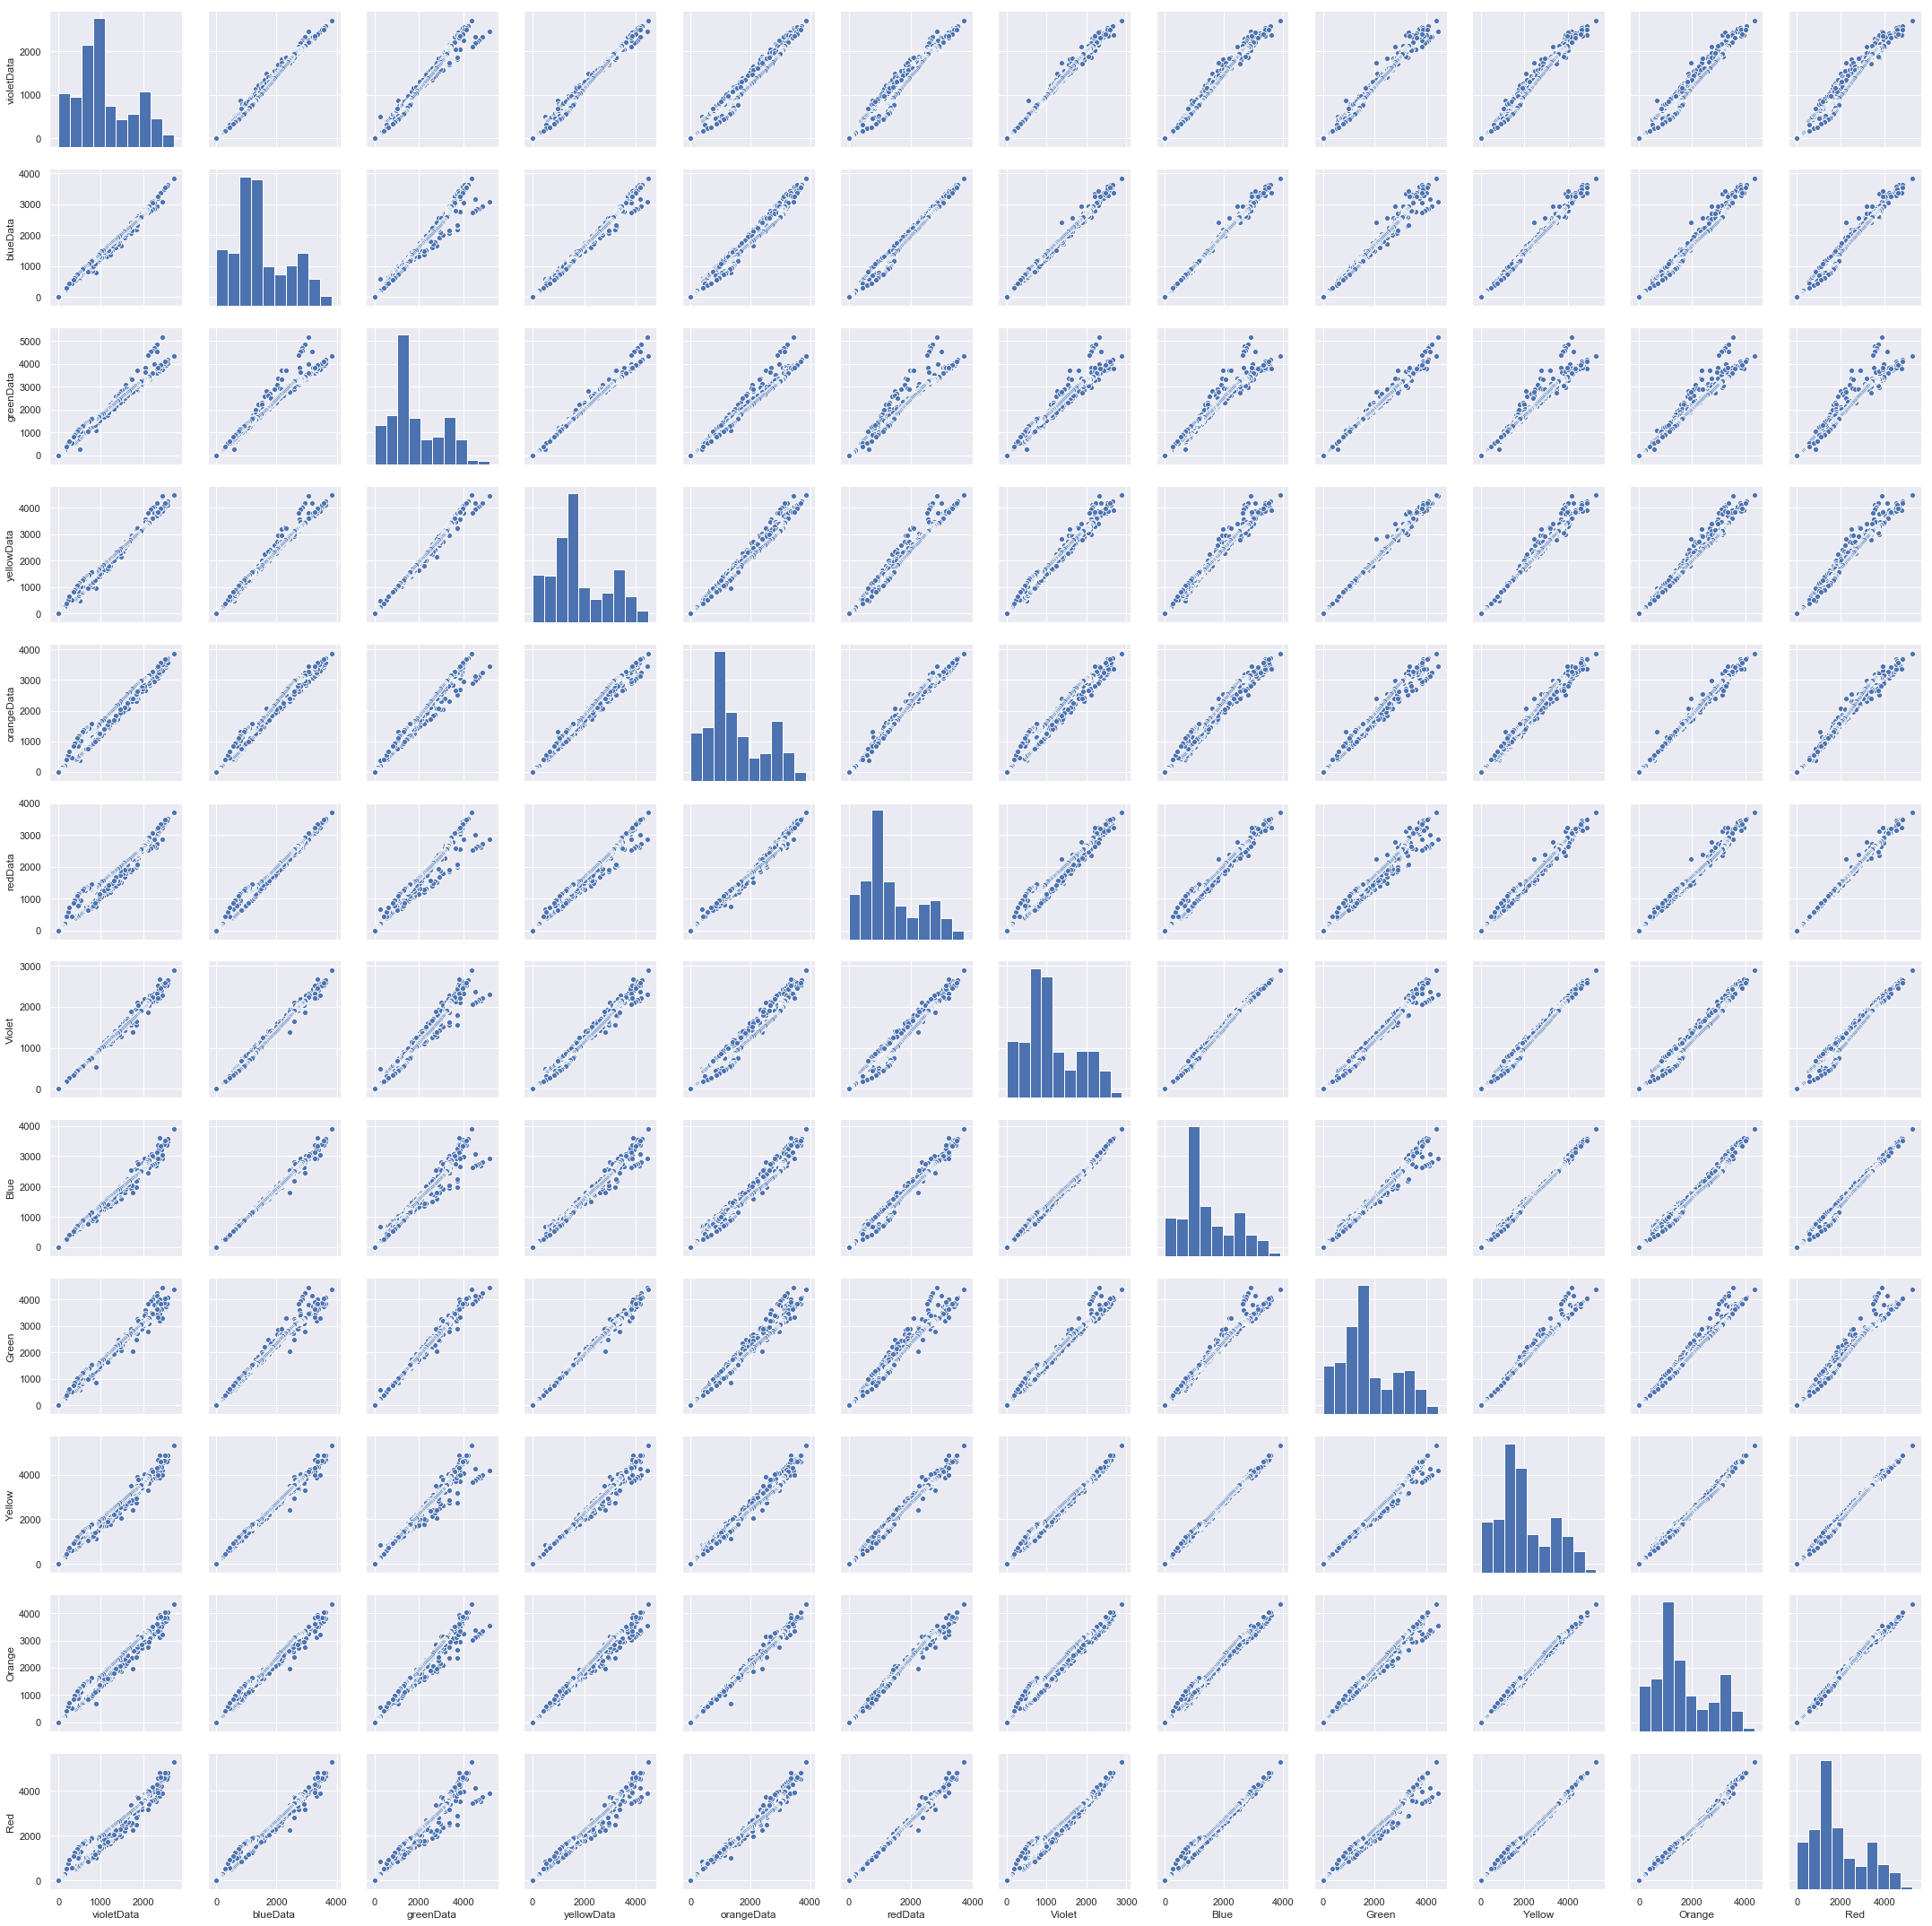

In [35]:
import seaborn as sns
sns.pairplot(Stationary_Wearable)

### using seaborn to visualize the dataset with column distribution

In [36]:
"""sns.set(color_codes=True)
for i in range(Stationary_Wearable.shape[1]):
    plt.figure()
    sns.distplot(Stationary_Wearable.iloc[:,i])"""

'sns.set(color_codes=True)\nfor i in range(Stationary_Wearable.shape[1]):\n    plt.figure()\n    sns.distplot(Stationary_Wearable.iloc[:,i])'

In [38]:
#Wearable

### MLP: 3 layers, 32 perceptrons/layer, relu and adam

In [60]:
X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
X_test = sc.fit_transform(X_test)
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))
# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))
# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 6))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the ANN to the Training set
#history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 100)
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = 20)
   
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

Train on 444 samples, validate on 112 samples
Epoch 1/20
444/444 [==============================] - 0s 1ms/step - loss: 3810658.5760 - val_loss: 3769011.8705
Epoch 2/20
444/444 [==============================] - 0s 259us/step - loss: 3789837.3305 - val_loss: 3715404.7679
Epoch 3/20
444/444 [==============================] - 0s 291us/step - loss: 3645712.3694 - val_loss: 3406437.9040
Epoch 4/20
444/444 [==============================] - 0s 316us/step - loss: 3084804.2235 - val_loss: 2518562.0000
Epoch 5/20
444/444 [==============================] - 0s 230us/step - loss: 2010425.5212 - val_loss: 1269103.5190
Epoch 6/20
444/444 [==============================] - 0s 213us/step - loss: 941096.1571 - val_loss: 671729.8560
Epoch 7/20
444/444 [==============================] - 0s 281us/step - loss: 592063.6432 - val_loss: 607754.6205
Epoch 8/20
444/444 [==============================] - 0s 350us/step - loss: 524640.4410 - val_loss: 566601.1802
Epoch 9/20
444/444 [==============================

### Plot the real value vs prediction

Text(0.5,1,'73944.60865894928')

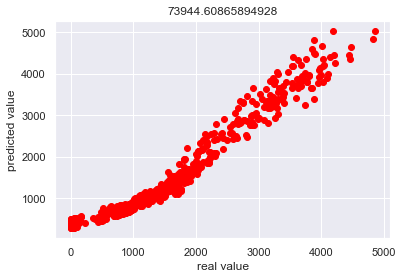

In [45]:
plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel('real value')
plt.ylabel('predicted value')
plt.title(mse)

### Plot the loss history

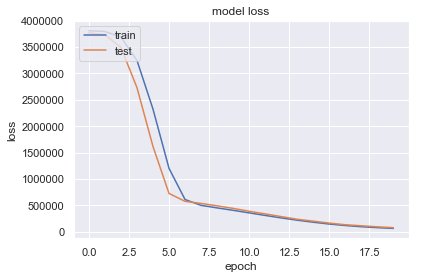

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Regressors

In [47]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
YY_T = rr.predict([X_test[0,:]])
#print YY_T
#print y_test.iloc[0,:]

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print test_score

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)
print Lasso_test_score

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print Ridge_test_score

0.9887746164786154
0.9886627781361896
0.988772374490312


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/pyth

### Another version of regression

In [53]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from pandas import DataFrame

In [66]:
train = np.hstack((X_train,y_train))

#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(DataFrame(train).values)
    # here I just regress to one column
    rmse= np.sqrt(-cross_val_score(model, DataFrame(train).values, y_train.iloc[:,0], scoring="neg_mean_squared_error",cv = kf))
    return(rmse)
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')
#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(np.mean(score), np.std(score)))


 Lasso score: 2.5477 (1.0948)



In [67]:
#Gradient Boosting Regression
print (np.array(GBoost))
score = RMSLE_cv(GBoost)
print (score)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(np.mean(score), np.std(score)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
[22.08566489 20.44353355 47.08075607 30.36254191 24.56138384]

 GBoost score: 28.9068 (9.6897)



In [68]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
 

 Averaged base models score: 14.8531 (4.8186)



In [72]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
averaged_models.fit(DataFrame(X_train).values, y_train.iloc[:,0]) 
stacked_train_pred = averaged_models.predict(DataFrame(X_train).values)
stacked_pred = np.expm1(averaged_models.predict(DataFrame(X_test).values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train.iloc[:,0],stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(DataFrame(X_train).values, y_train.iloc[:,0])

RMSLE score on the train data:
31.151809343244622
Accuracy score:


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in expm1
  


0.997921126288423